<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Statistical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created: 10-16-2023, Updated: 10-17-2023

Main reference: [Statistical Inference](https://github.com/ua-datalab/Workshops/wiki/Statistical-Inference)

# Examples of the most common [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution)

## Continuous distributions

* [Normal or Gaussian](https://en.wikipedia.org/wiki/Normal_distribution)
* [Log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution)
* [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
* [Continuous Uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

## Discrete distributions

* [Dicrete Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)
* [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
* [Binomial distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

## Normal distribution

The general form of its probability density function is

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

The parameter
$\mu$  is the mean or expectation of the distribution (and also its median and mode), while the parameter
$\sigma$  is its standard deviation.


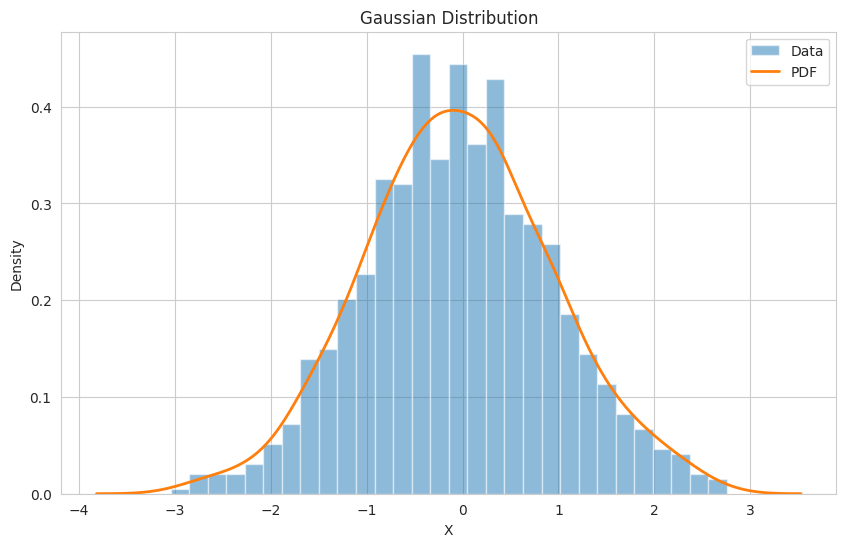

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set_style("whitegrid")


# Generate Gaussian distributed data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # mean=0, std=1

# Fit Gaussian distribution using statsmodels
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(kde.support, kde.density, lw=2, label='PDF')
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()


## Log-normal distribution

The probability density function is


$$
f(x | \mu, \sigma^2) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}
$$

where $\mu$ is the sample mean and $\sigma$ is the standard deviation.



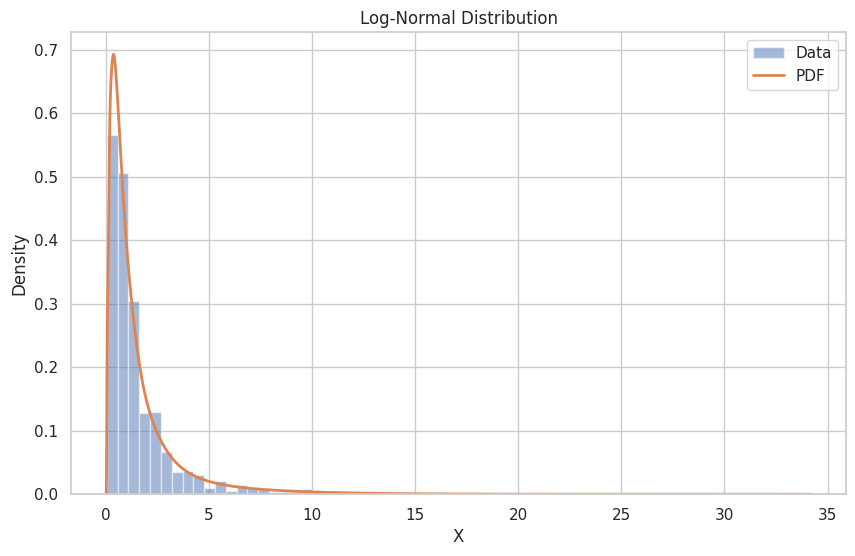

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate log-normally distributed data
np.random.seed(0)
data = np.random.lognormal(mean=0, sigma=1, size=1000)  # mean=0, std=1

# Fit log-normal distribution using statsmodels
kde = sm.nonparametric.KDEUnivariate(np.log(data))
kde.fit()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(np.exp(kde.support), kde.density / np.exp(kde.support), lw=2, label='PDF')
plt.title('Log-Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()


## Exponential distribution

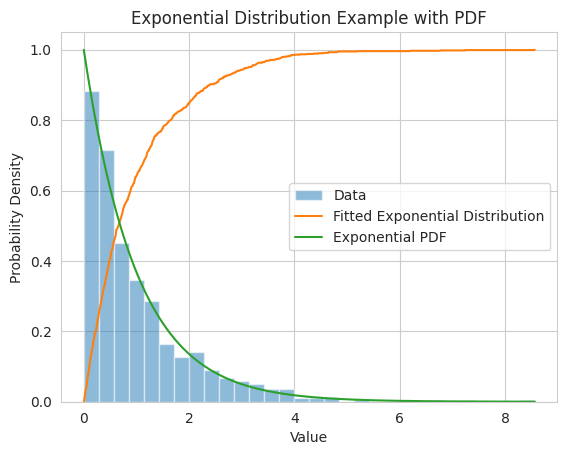

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import expon

# Generate exponentially distributed data
np.random.seed(0)
data = np.random.exponential(scale=1.0, size=1000)

# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Fit exponential distribution using statsmodels
ecdf = sm.distributions.ECDF(data)
x = np.linspace(min(data), max(data), 1000)
y = ecdf(x)

# Plot the fitted exponential distribution
plt.plot(x, y, label='Fitted Exponential Cummulative Distribution Function')

# Plot the PDF of the exponential distribution for comparison
pdf_x = np.linspace(min(data), max(data), 1000)
pdf_y = expon.pdf(pdf_x)
plt.plot(pdf_x, pdf_y, label='Exponential PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Exponential Distribution Example with PDF')
plt.show()



# Discrete probability distribution functions

## Discrete uniform distribution



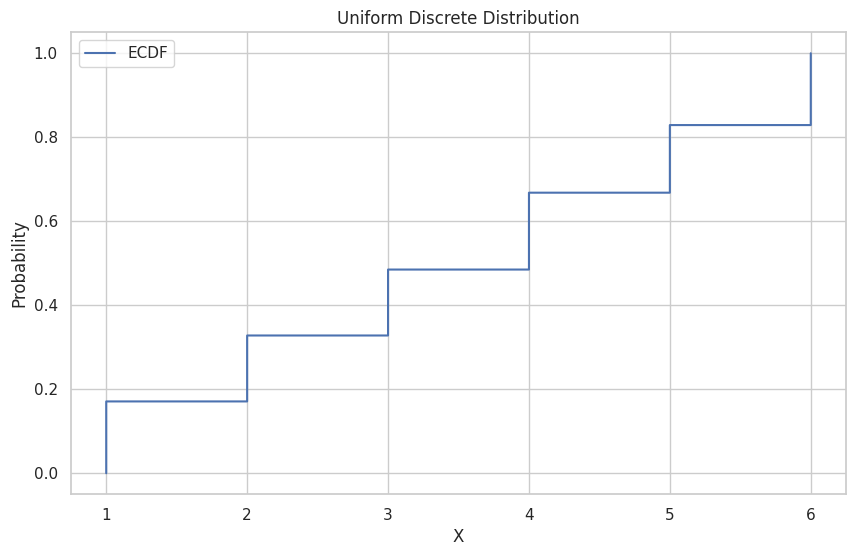

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate uniform discrete distributed data
np.random.seed(0)
data = np.random.randint(1, 7, size=1000)  # Simulating a fair 6-sided die

# Fit uniform discrete distribution using statsmodels
ecdf = sm.distributions.ECDF(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF')
plt.title('Uniform Discrete Distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()


This code snippet employs the _Empirical Cumulative Distribution Function (ECDF)_ from `statsmodels` to describe the distribution of the generated uniform discrete data.

## Poisson distribution



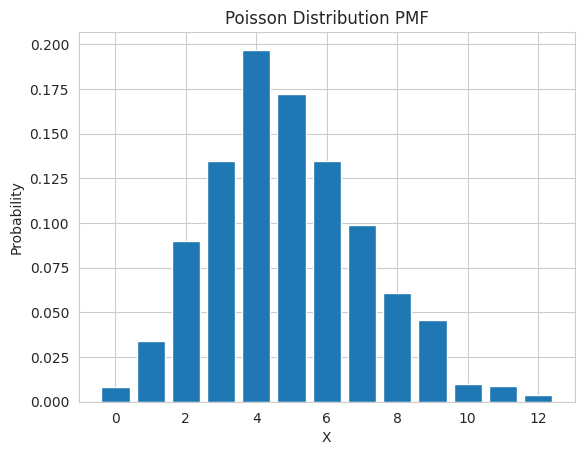

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate Poisson distributed data
lambda_param = 5
data = np.random.poisson(lambda_param, 1000)

# Calculate PMF using statsmodels
unique, counts = np.unique(data, return_counts=True)
pmf = counts / len(data)

# Plotting
plt.bar(unique, pmf)
plt.title('Poisson Distribution PMF')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()



## Binomial Distribution

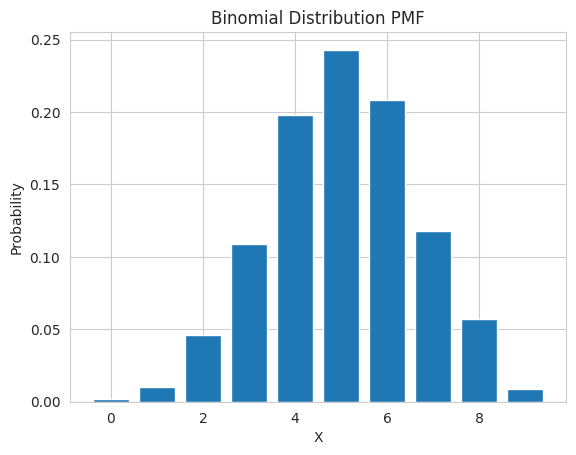

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate Binomial distributed data
n_trials = 10
p_success = 0.5
data = np.random.binomial(n_trials, p_success, 1000)

# Calculate PMF using statsmodels
unique, counts = np.unique(data, return_counts=True)
pmf = counts / len(data)

# Plotting
plt.bar(unique, pmf)
plt.title('Binomial Distribution PMF')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


Binomial-distributed data with 10 trials and a success probability of 0.5. It then calculates and plots the PMF.
